# Importing the dependencies and displaying an example training image

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


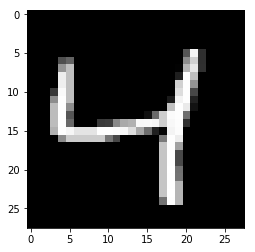

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data' , validation_size = 0)
    
img = mnist.train.images[2]
plt.imshow(img.reshape((28,28)) , cmap = 'Greys_r')

# Model

In [6]:
encoding_dim = 32

image_size = mnist.train.images.shape[1]

inputs_ = tf.placeholder(tf.float32 , (None , image_size) , name = 'inputs')
targets_ = tf.placeholder(tf.float32 , (None , image_size) , name = 'targets')

encoded = tf.layers.dense(inputs_ , encoding_dim , activation = tf.nn.relu)

logits = tf.layers.dense(encoded , image_size , activation = None)

decoded = tf.nn.sigmoid(logits , name = 'output')

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels = targets_ , logits = logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

# Training

In [9]:
sess = tf.Session()

epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_ : batch[0] , targets_ : batch[0]}
        batch_cost,_ = sess.run([cost , opt] , feed_dict = feed)
        
        print("Epochs: {}/{}...".format(e+1 , epochs) , "Training loss: {:.4f}".format(batch_cost))

Epochs: 1/20... Training loss: 0.6955
Epochs: 1/20... Training loss: 0.6924
Epochs: 1/20... Training loss: 0.6896
Epochs: 1/20... Training loss: 0.6863
Epochs: 1/20... Training loss: 0.6829
Epochs: 1/20... Training loss: 0.6781
Epochs: 1/20... Training loss: 0.6731
Epochs: 1/20... Training loss: 0.6659
Epochs: 1/20... Training loss: 0.6578
Epochs: 1/20... Training loss: 0.6479
Epochs: 1/20... Training loss: 0.6371
Epochs: 1/20... Training loss: 0.6271
Epochs: 1/20... Training loss: 0.6140
Epochs: 1/20... Training loss: 0.5997
Epochs: 1/20... Training loss: 0.5827
Epochs: 1/20... Training loss: 0.5663
Epochs: 1/20... Training loss: 0.5513
Epochs: 1/20... Training loss: 0.5339
Epochs: 1/20... Training loss: 0.5126
Epochs: 1/20... Training loss: 0.4951
Epochs: 1/20... Training loss: 0.4798
Epochs: 1/20... Training loss: 0.4579
Epochs: 1/20... Training loss: 0.4441
Epochs: 1/20... Training loss: 0.4255
Epochs: 1/20... Training loss: 0.4118
Epochs: 1/20... Training loss: 0.3927
Epochs: 1/20

# Checking out the results

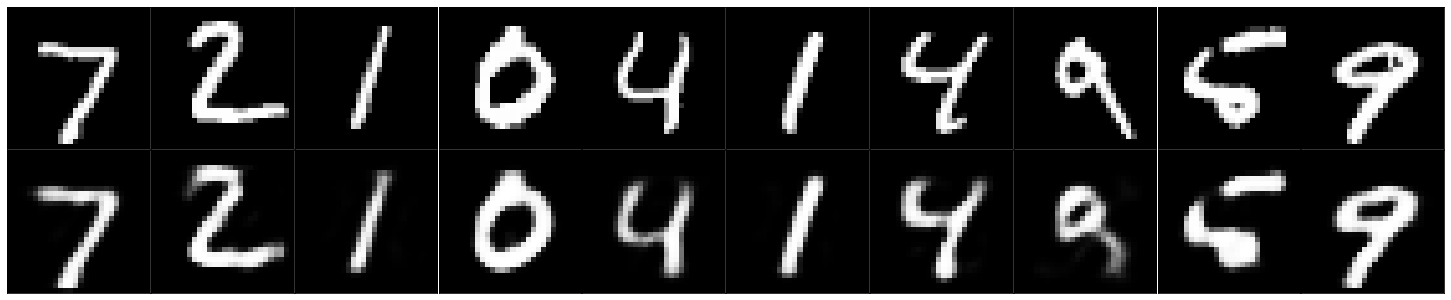

In [12]:
fig , axes = plt.subplots(nrows = 2 , ncols = 10 , sharex = True , sharey = True , figsize = (20 , 4))
in_imgs = mnist.test.images[:10]
reconstructed , compressed = sess.run([decoded , encoded] , feed_dict = { inputs_ : in_imgs})

for images , row in zip([in_imgs , reconstructed] , axes):
    for img , ax in zip(images , row):
        ax.imshow(img.reshape((28 , 28)) , cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
    fig.tight_layout(pad=0.1)

In [13]:
sess.close()